# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable base on some other combination of variables, even shorter.... predicting a number.

In [72]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


## Creating a data to view and fit


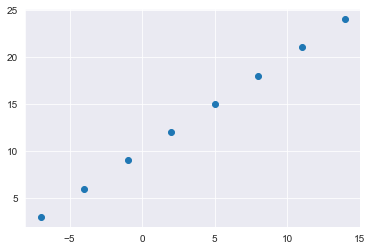

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualise it
plt.scatter(X, y)

In [74]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [75]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [76]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [77]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [78]:
input_shape = X[0].shape
output_shape = X[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Create a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compling the model** - define the los function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [79]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE is short for mean absolute error
             optimizer=tf.keras.optimizers.SGD(), # SGD is short for Stochastic Gradient Descent
             metrics=['mae']
             )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 149ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


2022-08-07 15:21:11.153852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [80]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 25ms/step


2022-08-07 15:21:11.265367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[12.716021]], dtype=float32)

In [81]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving the model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compile a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [82]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model'
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model (this time we will train for longer)
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 145ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100


2022-08-07 15:21:11.413562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 9.8969 - mae: 9.8969
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7644 - mae: 9.7644
Epoch 13/100
1/1 [==============================] - 0s 7ms/step - loss: 9

In [83]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [84]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 26ms/step


2022-08-07 15:21:12.228269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[29.739855]], dtype=float32)

In [85]:
# Exercise: change one hyperparameter and see effect on accuracy of model

# 1. Create the model (This time I have added a new dense layer with 100 units
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(50, activation=None),
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100


2022-08-07 15:21:12.411084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 193ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4149 - mae: 10.4149
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 9.7211 - mae: 9.7211
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 9.0103 - mae: 9.0103
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.3316 - mae: 7.3316
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 7.4673 - ma

In [86]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [87]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 30ms/step


2022-08-07 15:21:13.288983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[26.583878]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:
 > 'Visualize, visualize, visualize'\

It's a good idea to visulize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how does the predictions of the model line up against the ground truth (the original labels)?

In [88]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [89]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

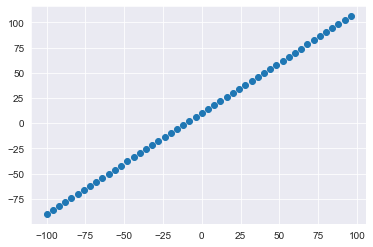

In [90]:
# Visualize the data
plt.scatter(X, y)

### The three sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model get tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set set is typically 10-15% of the total data available.

In [91]:
# Check the length of how many samples we have
len(X)

50

In [92]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

## Visualising the data
Now we've got our data in training and test sets... let's visualize it again!

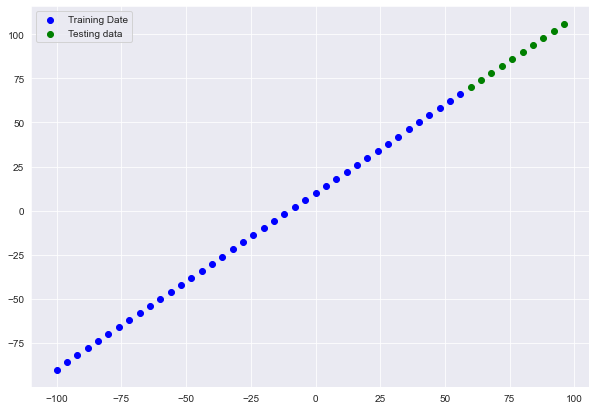

In [93]:
plt.figure(figsize=(10, 7))
# plot training date in blue
plt.scatter(X_train, y_train, c='b', label='Training Date')
plt.scatter(X_test, y_test, c='g', label='Testing data')
# show a legend
plt.legend();

In [94]:
# Let's have a look at how to build a neural network for our data

# 1. Create a mode
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. fit the model
#model.fit(X_train, y_train, epochs=100)

## Visualizing the model

In [95]:
# model.summary()  # Commented out for smooth running of the notebook

In [96]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# Create a model (same as above)

# 1. Create a mode
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
        tf.keras.layers.Dense(1, name='output_layer')
    ],
    name='model_1'
)

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['mae']
)

In [97]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these aren't updated during training (this is typical when you bring in already learnt patterns or parameters from other models during **transfer learning**).

**EXERCISE:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of  parameters (total and trainable) by calling ``model.summary()``

In [98]:
# 1. Create the model
model_exercise = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(50, input_shape=[1], name='input_layer'),
        tf.keras.layers.Dense(1, name='output_layer')
    ],
    name='Model_created_for_exercise'
)

# 2. Compile the model
model_exercise.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_exercise.build()

In [99]:
model_exercise.summary()

Model: "Model_created_for_exercise"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [100]:
from tensorflow.keras.utils import plot_model

plot_model(model_exercise, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [101]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [102]:
model.fit(X_train, y_train, epochs=100, verbose=0)

2022-08-07 15:21:13.708308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## Visualising a model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus model's predictions).

In [103]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred.T,y_test

1/1 [==============================] - 0s 23ms/step


2022-08-07 15:21:14.588475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(array([[ 70.55218 ,  75.1399  ,  79.72763 ,  84.315346,  88.90307 ,
          93.4908  ,  98.078514, 102.66624 , 107.25397 , 111.84169 ]],
       dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [104]:
# Let's create a plotting function
def plot_predictions(
        train_data=X_train,
        train_labels=y_train,
        test_data=X_test,
        test_labels=y_test,
        predictions=y_pred):
    """
    plots training data, test data and compares predictions to ground truth labels
    """
    plt.figure(figsize=(10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data')

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', label='Testing data')

    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c='r', label='Predictions')

    # Show legend
    plt.legend();

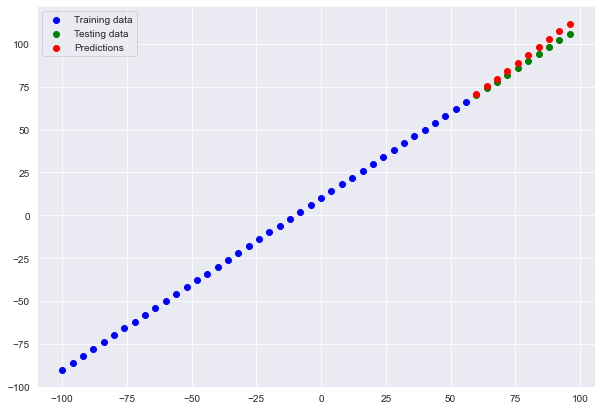

In [105]:
plot_predictions(
        train_data=X_train,
        train_labels=y_train,
        test_data=X_test,
        test_labels=y_test,
        predictions=y_pred)

## Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, 'on average, how wrong is each of my model's predictions'
* MSE - mean square error, 'square the average errors'

In [106]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 63ms/step - loss: 3.1969 - mae: 3.1969


2022-08-07 15:21:14.747902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[3.1969330310821533, 3.1969330310821533]

In [107]:
# Calculate the mean absolute error
tf.keras.losses.mae(y_test, y_pred.T)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([3.196933], dtype=float32)>

In [108]:
# Calculate the mean square error
tf.keras.losses.mean_squared_error(y_test, y_pred.T)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([13.070086], dtype=float32)>

In [109]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.keras.losses.mae(y_true=y_true,y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.keras.losses.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.
4. `model_4` - TBC

**Build `model_1`**

In [110]:
# 1. Create the model
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, input_shape=[1], name='Input_Layer'),
    ],
    name='Model_1'
)

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100, verbose=0)

2022-08-07 15:21:14.935817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 21ms/step


2022-08-07 15:21:15.853409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


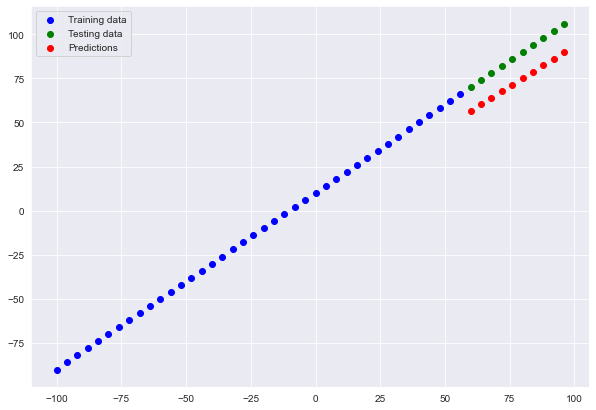

In [111]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)

plot_predictions(predictions=y_preds_1)

In [112]:
# Calculate model_1 evalution metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.8109865>,
 <tf.Tensor: shape=(), dtype=float32, numpy=220.18053>)

In [113]:
model_1.evaluate(X_test, y_test)

y_pred = model_1.predict(X_test)

print(mae(y_pred=y_pred, y_true=y_test))
print(mse(y_pred=y_pred, y_true=y_test))

1/1 [==============================] - 0s 59ms/step - loss: 14.8110 - mae: 14.8110


2022-08-07 15:21:16.019720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 9ms/step
tf.Tensor(14.8109865, shape=(), dtype=float32)
tf.Tensor(220.18053, shape=(), dtype=float32)


**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [114]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, input_shape=[1], name='Input_Layer'),
        tf.keras.layers.Dense(1, name='Output_Layer')
    ],
    name='Model_2'
)

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mse']
)

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

2022-08-07 15:21:16.240764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 24ms/step


2022-08-07 15:21:17.163362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


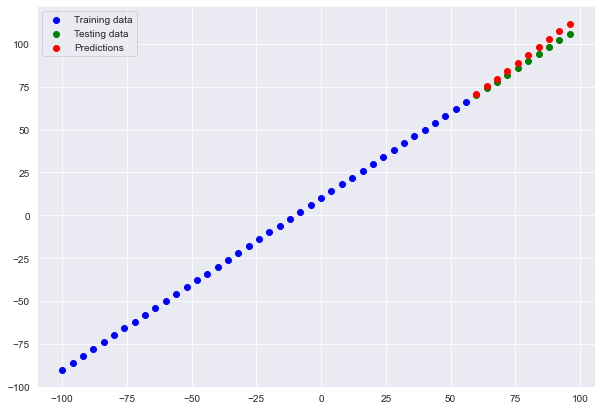

In [115]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)

plot_predictions(predictions=y_preds_2)

In [116]:
# Calculate model_2 evalution metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.196933>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070086>)

In [117]:
model_2.evaluate(X_test, y_test)

y_pred = model_2.predict(X_test)

print(mae(y_pred=y_pred, y_true=y_test))
print(mse(y_pred=y_pred, y_true=y_test))

1/1 [==============================] - 0s 8ms/step
tf.Tensor(3.196933, shape=(), dtype=float32)
tf.Tensor(13.070086, shape=(), dtype=float32)


2022-08-07 15:21:17.477998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


**Build `model_3`**

* 2 dense layers trained for 500 epochs

In [118]:
# Set random set
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, input_shape=[1], name='Input_Layer'),
        tf.keras.layers.Dense(1, name='Output_Layer')
    ],
    name='Model_3'
)

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500, verbose=0)

2022-08-07 15:21:17.695624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 25ms/step


2022-08-07 15:21:21.830563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


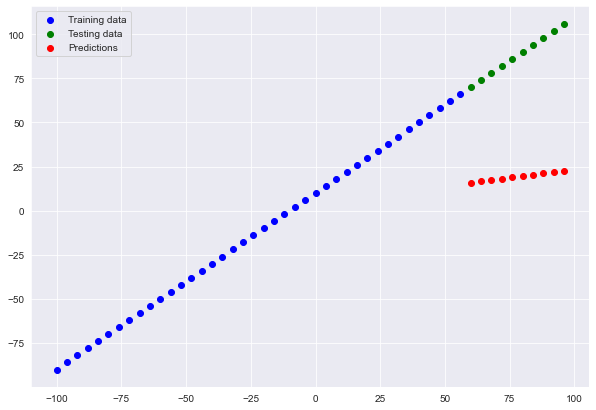

In [119]:
# Make and plot predictions
y_preds_3 = model_3.predict(X_test)

plot_predictions(predictions=y_preds_3)

In [120]:
# Calculate model_3 evalution metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.029>)

In [121]:
model_3.evaluate(X_test, y_test)

y_pred = model_3.predict(X_test)

print(mae(y_pred=y_pred, y_true=y_test))
print(mse(y_pred=y_pred, y_true=y_test))

2022-08-07 15:21:21.992992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 8ms/step
tf.Tensor(68.713615, shape=(), dtype=float32)
tf.Tensor(4808.029, shape=(), dtype=float32)


## Comparing the results of our experiments

We've run a few experiments, now lets compare the results.

In [122]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [
    ['model_1', mae_1.numpy(), mse_1.numpy()],
    ['model_2', mae_2.numpy(), mse_2.numpy()],
    ['model_3', mae_3.numpy(), mse_3.numpy()]
]

all_results = pd.DataFrame(model_results, columns=['Models', 'mae', 'mse'])
all_results

,Models,mae,mse
0,model_1,14.810987,220.180527
1,model_2,3.196933,13.070086
2,model_3,68.713615,4808.028809


Looks like `model_2` preformed the best..

In [123]:
model_2.summary()

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> **Note:** one of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what dos work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One good habit in machine learning modelling is to track the results of your experiments.

and when doing soe, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

** Resource ** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights and Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our models

Saving our models allows us to use them outside of google colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [124]:
# Save a model using the SavedModel Format
model_2.save('Model_2-section1_SavedModel_format')

INFO:tensorflow:Assets written to: Model_2-section1_SavedModel_format/assets


INFO:tensorflow:Assets written to: Model_2-section1_SavedModel_format/assets


In [125]:
# Save model using the HDF5 format
model_2.save('Model_2-section1_HDF5_format.h5')

## Loading a saved model

In [126]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('Model_2-section1_SavedModel_format/')
loaded_SavedModel_format.summary()

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [127]:
# Compare model_2 predictions with SavedModel Format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 24ms/step


2022-08-07 15:21:22.512012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-07 15:21:22.551157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [128]:
# Load in the HDF5 format model
loaded_h5_format = tf.keras.models.load_model('Model_2-section1_HDF5_format.h5')
loaded_h5_format.summary()

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [129]:
# Compare model_2 predictions with HDF5 format model predictions
loaded_h5_format_preds = loaded_h5_format.predict(X_test)

model_2_preds == loaded_h5_format_preds

1/1 [==============================] - 0s 25ms/step


2022-08-07 15:21:22.625437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### A larger example

In [130]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [135]:
# Let's try to one-hot encode our DataFrame, so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [136]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop(columns=['charges'])
y = insurance_one_hot.charges

In [137]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [138]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [139]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state=42,
    test_size=0.2
)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [142]:
# Build a neural network (Sort of like model_2)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100


2022-08-07 15:57:19.970640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 1s 7ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7886.7764 - mae: 7886.7764
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7748.3882 - mae: 7748.3882
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7595.3945 - mae: 7595.3945
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7698.5596 - mae: 7698.5596
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7496.7783 - mae: 7496.7783
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7493.1748 - mae: 7493.1748
Epoch 11/10

In [143]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7023.3315 - mae: 7023.3311


2022-08-07 16:08:41.645675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[7023.33154296875, 7023.3310546875]

In [145]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To try to improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and used the Adam optimizer
2. Same as before but train for longer (200 epochs)

In [150]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
22/34 [==================>...........] - ETA: 0s - loss: 13371.6338 - mae: 13371.6338

2022-08-07 17:41:49.877263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 5ms/step - loss: 13273.1592 - mae: 13273.1592
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 12749.5439 - mae: 12749.5439
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 12055.7588 - mae: 12055.7588
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 10905.8301 - mae: 10905.8301
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 9457.7471 - mae: 9457.7471
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 8147.6812 - mae: 8147.6812
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7528.8521 - mae: 7528.8521
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7429.1553 - mae: 7429.1553
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7409.0811 - mae: 7409.0811
E

In [151]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4924.3413 - mae: 4924.3413


2022-08-07 17:42:06.760473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[4924.34130859375, 4924.34130859375]

In [156]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

2022-08-07 17:55:41.102985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [157]:
# Evaluate the model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3491.8232 - mae: 3491.8232


2022-08-07 17:56:08.330934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[3491.8232421875, 3491.8232421875]

Text(0.5, 0, 'epochs')

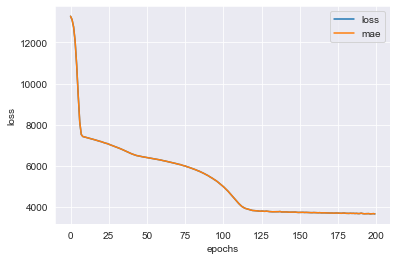

In [158]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

**Question:** How long should you train for?

It depends. Really... It depends on the problem you are working on. However, many people have asked this question before... so TensorFlow has as solution it's called the EarlyStopping Callback, which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

To use the EarlyStopping Callback it must first be created as an object, with specified parameters. The parameters are
* `Monitor` - Quantity to be monitored
* `min_delta` - Minimum change in the monitored quantity to qualify as an improvement, an absolute change of less than this param will count as no improvement
* `patience` - Number of epochs with no improvement after which training will be stopped.
* `verbose` - How visible the output is. 1 displays messages when the callback takes an action, 0 will disable this.
* `mode` - One of the following modes; `{'auto', 'min', 'max'}`. In `min` mode, training will stop when the quantity has stopped decreasing, `max` will stop when it stops increasing and `auto` will infer the direction from the name of the monitored quantity.
* `baseline` - Baseline value for hte monitored quantity, Training will stop if the model doesn't show improvement over the baseline.
* `restore_best_weights` - Whether to restore model weights from each epoch with the best value of the monitored quantity. If `False`, the model weights obtained at the last step of training are used. An epoch will be restored regardless of the model performance to the `baseline`. If no epoch improves on `baseline`, training will run for `patience` epochs and restore weights from the best epoch in that set.

#### Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure which to use, you could try both and see which is better.

To prepare our data, we can borrow a few classes from Scikit-Learn.

In [163]:
# Import preprocessing libraries
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [164]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),  # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])  # one-hot encode these columns
)

# Create X and y values
X = insurance.drop('charges', axis=1)
y = insurance.charges

# Create test and train set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

Beautiful! Our data has been normalized and one-hot encoded.
Now let's build a neural network model on it and see how it goes.

In [166]:
# Build a neural network model to fit on our normalized data
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics='mae'
)

# 3. Fit the model
history = insurance_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
21/34 [=================>............] - ETA: 0s - loss: 13346.9375 - mae: 13346.9375

2022-08-07 21:01:44.309031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 6ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 13312.0225 - mae: 13312.0225
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 13267.7920 - mae: 13267.7920
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 13066.4531 - mae: 13066.4531
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 12888.1982 - mae: 12888.1982
Epoch 8/200
34/34 [==============================] - 0s 5ms/step - loss: 12644.6592 - mae: 12644.6592
Epoch 9/200
34/34 [==============================] - 0s 5ms/step - loss: 12325.5557 - mae: 12325.5557
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 11925.9766 - mae: 11

In [167]:
# Evaluate model
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3171.9863 - mae: 3171.9863


2022-08-07 21:02:25.234986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[3171.986328125, 3171.986328125]

<AxesSubplot:>

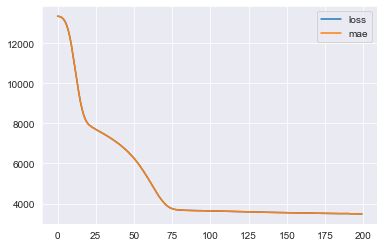

In [168]:
pd.DataFrame(history.history).plot()

In [165]:
insurance_model_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 100)               1200      
                                                                 
 dense_26 (Dense)            (None, 10)                1010      
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________
